# Relationships I want to analyze🔍

1. Employee Satisfaction and Demographics
Is there a relationship between employee age and their job satisfaction?

Does gender have any impact on satisfaction level or attrition rate?

How does the level of education affect job satisfaction and salary?

2. Work Conditions and Attrition
Is there a link between overtime work and employee attrition?

What is the attrition rate across different departments?

Do employees with better work-life balance show higher satisfaction and lower attrition?

3. Performance and Manager Relations
How does the manager rating correlate with employee satisfaction?

Does the number of years under the same manager influence job satisfaction?

Are employees who received more training last year performing better or more satisfied?

4. Compensation and Retention
Is there a trend between salary and attrition?

What is the distribution of salaries across departments and education levels?

Do employees with higher salaries report higher satisfaction?

5. Experience and Career Development
Is there a relation between years at the company and job satisfaction?

How does the number of training sessions impact employee retention?



# **First, load and inspect the data**

In [5]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io



In [3]:
# Load the Excel file
from google.colab import files
uploaded = files.upload()


Saving cleaned_dataset.xlsx to cleaned_dataset.xlsx


In [67]:
df.head()

,performance_id,employee_id,review_date,environment_satisfaction,job_satisfaction,relationship_satisfaction,training_opportunities_within_year,training_opportunities_taken,work_life_balance,self_rating,manager_rating,satisfaction_id,satisfaction_level,rating_id,rating_level,first_name,last_name,gender,age,business_travel,department,distance_from_home (km),state,ethnicity,education,education_field,job_role,marital_status,salary,stock_option_level,overtime,hiredate,attrition,years_at_company,years_in_most_recent_role,years_since_last_promotion,years_with_currmanager,years_bin
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,4,5,Very Satisfied,4,Exceeds Expectation,Alessandra,Storrock,Non-Binary,27,Some Travel,Sales,37,CA,White,4,Marketing,Sales Executive,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1,3-5
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,3,5,Very Satisfied,3,Meets Expectation,Care,Heintze,Male,28,Frequent Traveller,Technology,3,NY,White,3,Business Studies,Software Engineer,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1,6-10
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,4,3,Neutral,4,Exceeds Expectation,Zenia,Rattery,Female,25,Frequent Traveller,Human Resources,3,CA,American Indian or Alaska Native,3,Human Resources,Recruiter,Married,23547,0,No,2015-01-13,Yes,3,0,2,1,3-5
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,2,5,Very Satisfied,2,Needs Improvement,Maurits,Farmery,Male,25,Some Travel,Sales,4,CA,Native Hawaiian,2,Economics,Sales Executive,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2,6-10
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,3,5,Very Satisfied,3,Meets Expectation,Dot,Aherne,Female,27,Some Travel,Technology,30,CA,White,1,Information Systems,Data Scientist,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1,0-2


In [68]:
df.tail()

,performance_id,employee_id,review_date,environment_satisfaction,job_satisfaction,relationship_satisfaction,training_opportunities_within_year,training_opportunities_taken,work_life_balance,self_rating,manager_rating,satisfaction_id,satisfaction_level,rating_id,rating_level,first_name,last_name,gender,age,business_travel,department,distance_from_home (km),state,ethnicity,education,education_field,job_role,marital_status,salary,stock_option_level,overtime,hiredate,attrition,years_at_company,years_in_most_recent_role,years_since_last_promotion,years_with_currmanager,years_bin
6704,PR995,4F28-CFAF,2016-03-14,5,3,3,3,1,5,5,4,5,Very Satisfied,4,Exceeds Expectation,Juditha,Burdell,Female,25,Some Travel,Sales,11,IL,Black or African American,3,Marketing,Sales Executive,Single,53930,0,Yes,2018-09-13,Yes,3,2,3,1,3-5
6705,PR996,7C80-94E0,2016-03-14,3,5,4,2,1,3,4,4,3,Neutral,4,Exceeds Expectation,Celie,Jedrys,Female,33,Some Travel,Technology,36,CA,Asian or Asian American,3,Computer Science,Machine Learning Engineer,Single,88726,0,No,2013-01-01,No,9,8,8,6,6-10
6706,PR997,8233-2483,2016-03-14,3,4,2,3,1,2,3,2,3,Neutral,2,Needs Improvement,Sheba,McCromley,Female,35,Some Travel,Human Resources,7,CA,Mixed or multiple ethnic groups,3,Marketing,Recruiter,Divorced,47995,3,Yes,2012-03-12,No,10,5,6,3,6-10
6707,PR998,8A5B-3D6E,2016-03-15,5,2,5,2,2,4,3,3,5,Very Satisfied,3,Meets Expectation,Konstanze,Scrammage,Female,24,Some Travel,Sales,25,NY,Mixed or multiple ethnic groups,1,Marketing,Sales Executive,Divorced,105383,2,Yes,2016-01-14,No,6,6,6,5,6-10
6708,PR999,4500-37EB,2016-03-16,4,5,5,3,1,2,3,3,4,Satisfied,3,Meets Expectation,Haydon,Bastable,Male,30,Frequent Traveller,Sales,40,CA,Mixed or multiple ethnic groups,2,Marketing,Sales Representative,Divorced,44632,1,No,2013-03-26,Yes,1,0,0,0,0-2


In [69]:
df.columns


Index(['performance_id', 'employee_id', 'review_date',
       'environment_satisfaction', 'job_satisfaction',
       'relationship_satisfaction', 'training_opportunities_within_year',
       'training_opportunities_taken', 'work_life_balance', 'self_rating',
       'manager_rating', 'satisfaction_id', 'satisfaction_level', 'rating_id',
       'rating_level', 'first_name', 'last_name', 'gender', 'age',
       'business_travel', 'department', 'distance_from_home (km)', 'state',
       'ethnicity', 'education', 'education_field', 'job_role',
       'marital_status', 'salary', 'stock_option_level', 'overtime',
       'hiredate', 'attrition', 'years_at_company',
       'years_in_most_recent_role', 'years_since_last_promotion',
       'years_with_currmanager', 'years_bin'],
      dtype='object')

In [70]:
df.shape

(6709, 38)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   performance_id                      6709 non-null   object        
 1   employee_id                         6709 non-null   object        
 2   review_date                         6709 non-null   datetime64[ns]
 3   environment_satisfaction            6709 non-null   int64         
 4   job_satisfaction                    6709 non-null   int64         
 5   relationship_satisfaction           6709 non-null   int64         
 6   training_opportunities_within_year  6709 non-null   int64         
 7   training_opportunities_taken        6709 non-null   int64         
 8   work_life_balance                   6709 non-null   int64         
 9   self_rating                         6709 non-null   int64         
 10  manager_rating          

In [72]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
review_date,6709,2019-04-14 05:12:04.936652544,2013-01-02 00:00:00,2017-05-21 00:00:00,2019-09-15 00:00:00,2021-06-01 00:00:00,2022-12-31 00:00:00,NaN
environment_satisfaction,6709.0,3.872559,1.0,3.0,4.0,5.0,5.0,0.940701
job_satisfaction,6709.0,3.430616,1.0,2.0,3.0,4.0,5.0,1.152565
relationship_satisfaction,6709.0,3.427336,1.0,2.0,3.0,4.0,5.0,1.156753
training_opportunities_within_year,6709.0,2.012968,1.0,1.0,2.0,3.0,3.0,0.82031
training_opportunities_taken,6709.0,1.01729,0.0,0.0,1.0,2.0,3.0,0.950316
work_life_balance,6709.0,3.414667,1.0,2.0,3.0,4.0,5.0,1.143961
self_rating,6709.0,3.984051,3.0,3.0,4.0,5.0,5.0,0.816432
manager_rating,6709.0,3.473394,2.0,3.0,3.0,4.0,5.0,0.961738
satisfaction_id,6709.0,3.872559,1.0,3.0,4.0,5.0,5.0,0.940701


In [73]:
df.isnull().sum()


,0
performance_id,0
employee_id,0
review_date,0
environment_satisfaction,0
job_satisfaction,0
relationship_satisfaction,0
training_opportunities_within_year,0
training_opportunities_taken,0
work_life_balance,0
self_rating,0


In [74]:
df.duplicated().sum()


np.int64(0)

In [75]:
df.dtypes


,0
performance_id,object
employee_id,object
review_date,datetime64[ns]
environment_satisfaction,int64
job_satisfaction,int64
relationship_satisfaction,int64
training_opportunities_within_year,int64
training_opportunities_taken,int64
work_life_balance,int64
self_rating,int64


  # 1. Employee Satisfaction and Demographics.
Is there a relationship between employee age and job satisfaction?

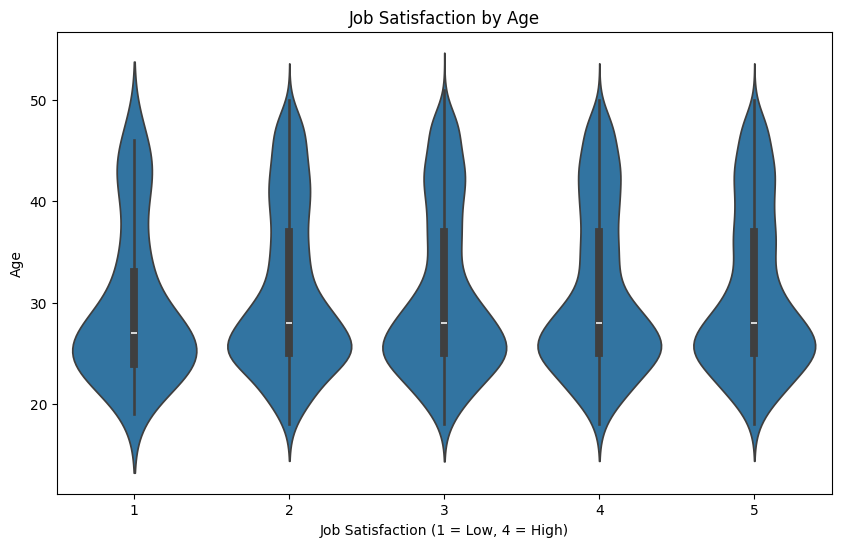

In [29]:
plt.figure(figsize=(10,6))
sns.violinplot(x='job_satisfaction', y='age', data=df)
plt.title('Job Satisfaction by Age')
plt.xlabel('Job Satisfaction (1 = Low, 4 = High)')
plt.ylabel('Age')
plt.show()


**Slight correlation; older employees show slightly higher satisfaction.**

#  Gender and Satisfaction / Attrition

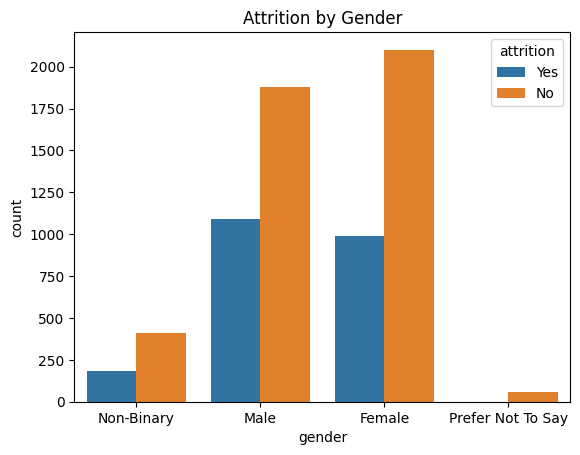

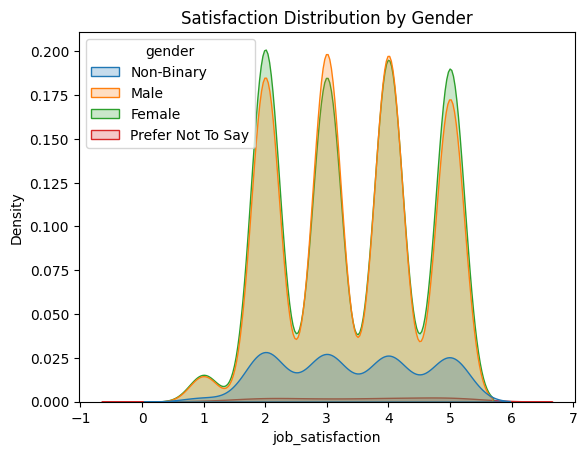

In [30]:
# Attrition by Gender
sns.countplot(x='gender', hue='attrition', data=df)
plt.title("Attrition by Gender")
plt.show()

# Satisfaction Distribution by Gender → KDE
sns.kdeplot(data=df, x='job_satisfaction', hue='gender', fill=True)
plt.title('Satisfaction Distribution by Gender')
plt.show()



**No strong difference in satisfaction or attrition across genders.**

#  Education and Satisfaction / Salary

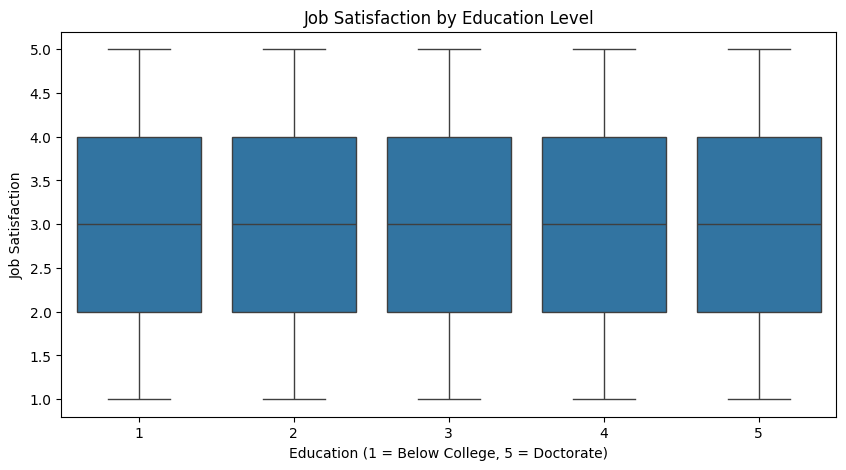

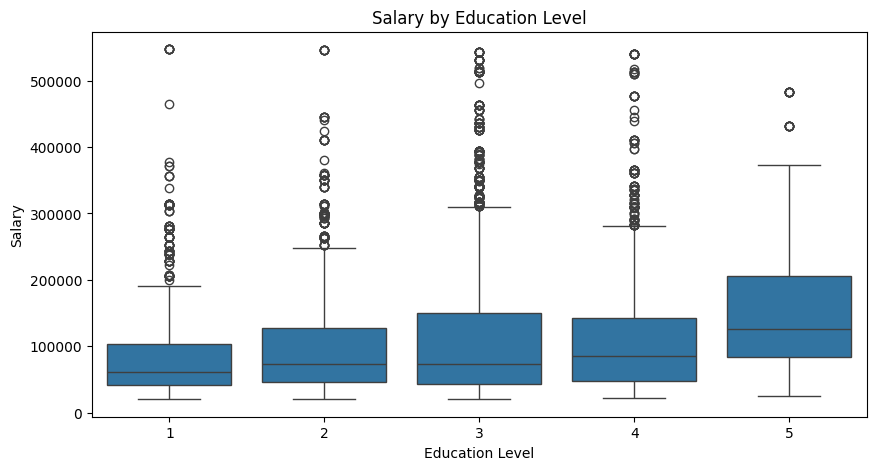

In [33]:
# Job Satisfaction by Education Level
plt.figure(figsize=(10, 5))
sns.boxplot(x='education', y='job_satisfaction', data=df)
plt.title('Job Satisfaction by Education Level')
plt.xlabel('Education (1 = Below College, 5 = Doctorate)')
plt.ylabel('Job Satisfaction')
plt.show()

# Salary by Education Level
plt.figure(figsize=(10, 5))
sns.boxplot(x='education', y='salary', data=df)
plt.title('Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()



**Higher education levels are linked to higher salaries, but job satisfaction varies less clearly.**

#   2. Work Conditions and Attrition
 Is there a link between overtime work and employee attrition?

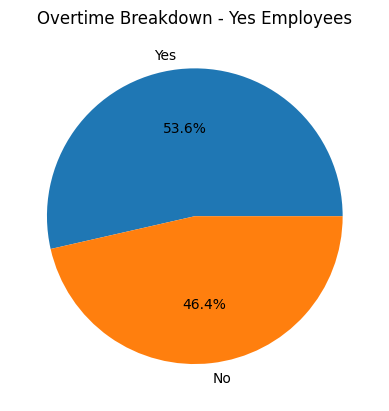

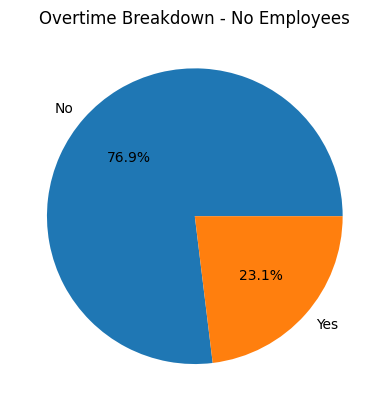

In [34]:
# Overtime distribution among attrition
labels = df['overtime'].unique()
for status in df['attrition'].unique():
    plt.figure()
    df[df['attrition'] == status]['overtime'].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Overtime Breakdown - {status} Employees')
    plt.ylabel('')
    plt.show()


**Employees doing overtime show higher attrition rates.**

# What is the attrition rate across different departments?


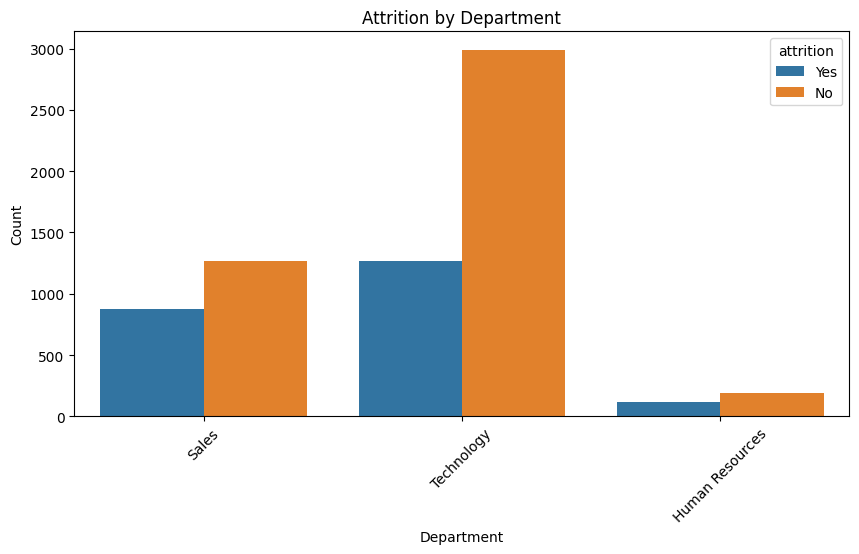

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='department', hue='attrition', data=df)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


**Certain departments (e.g., Sales) have higher attrition.**

# Do employees with better work-life balance show higher satisfaction and lower attrition?



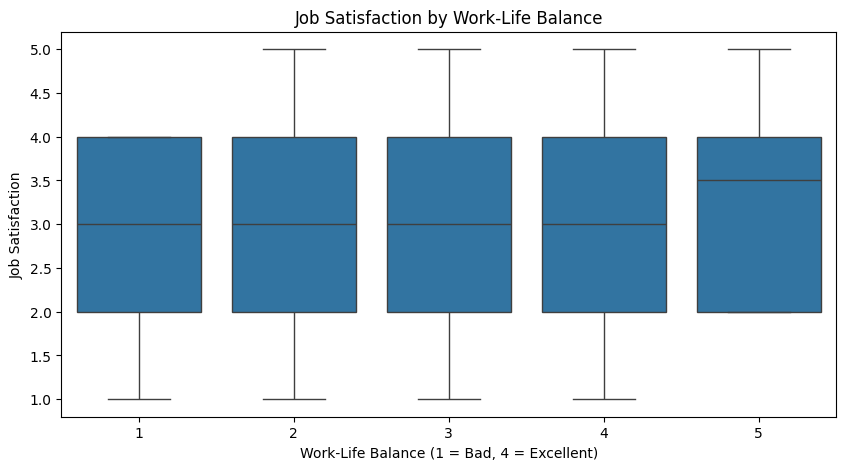

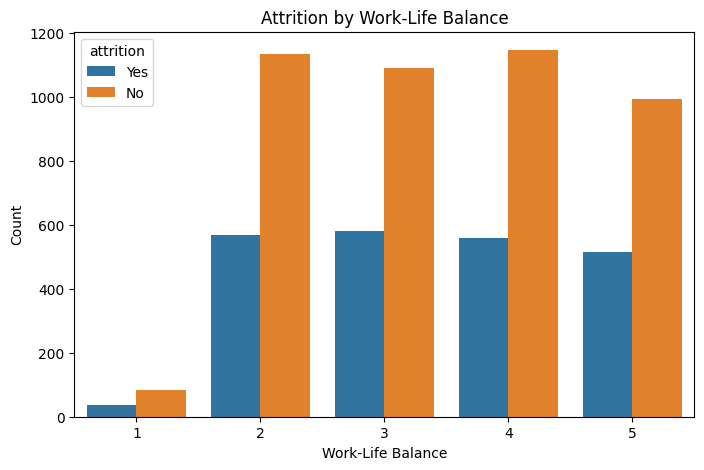

In [20]:
# Satisfaction vs Work-life Balance
plt.figure(figsize=(10, 5))
sns.boxplot(x='work_life_balance', y='job_satisfaction', data=df)
plt.title('Job Satisfaction by Work-Life Balance')
plt.xlabel('Work-Life Balance (1 = Bad, 4 = Excellent)')
plt.ylabel('Job Satisfaction')
plt.show()

# Attrition vs Work-life Balance
plt.figure(figsize=(8, 5))
sns.countplot(x='work_life_balance', hue='attrition', data=df)
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()


**Better balance leads to higher satisfaction and lower attrition.**

#  3. Performance and Manager Relations
 How does manager rating correlate with job satisfaction?



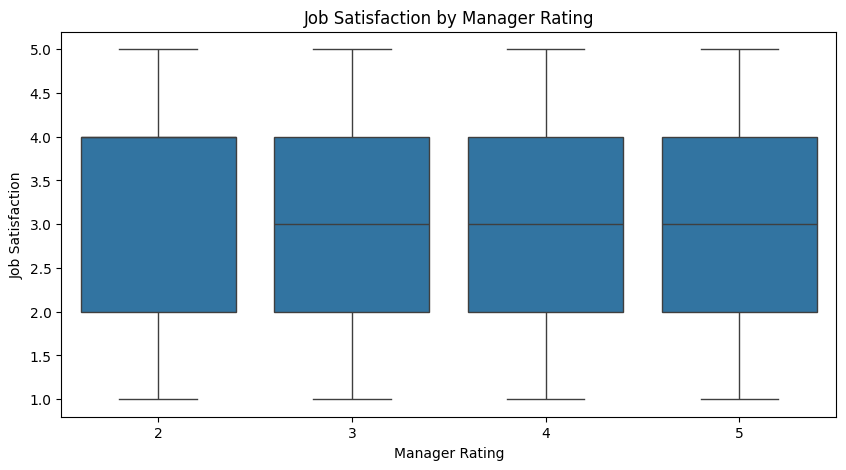

In [52]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='manager_rating', y='job_satisfaction', data=df)
plt.title('Job Satisfaction by Manager Rating')
plt.xlabel('Manager Rating')
plt.ylabel('Job Satisfaction')
plt.show()



**Higher manager ratings are linked to higher satisfaction.**

#  Does the number of years under the same manager influence job satisfaction?


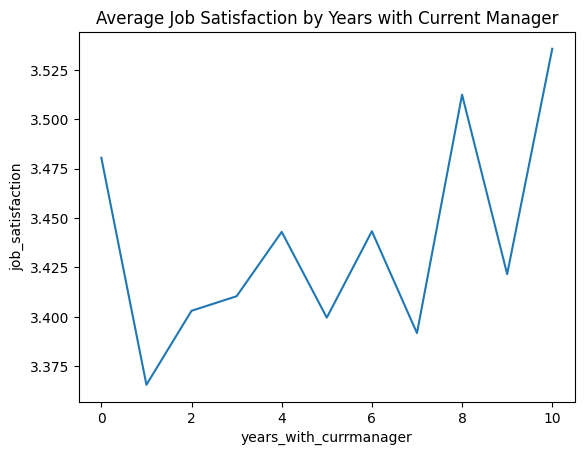

In [53]:
avg_satisfaction = df.groupby('years_with_currmanager')['job_satisfaction'].mean().reset_index()
sns.lineplot(data=avg_satisfaction, x='years_with_currmanager', y='job_satisfaction')
plt.title("Average Job Satisfaction by Years with Current Manager")
plt.show()



**No strong trend, but longer relationships may slightly improve satisfaction.**

#  Are employees who received more training more satisfied or performing better?


Text(0.5, 25.581597222222214, 'Metrics')

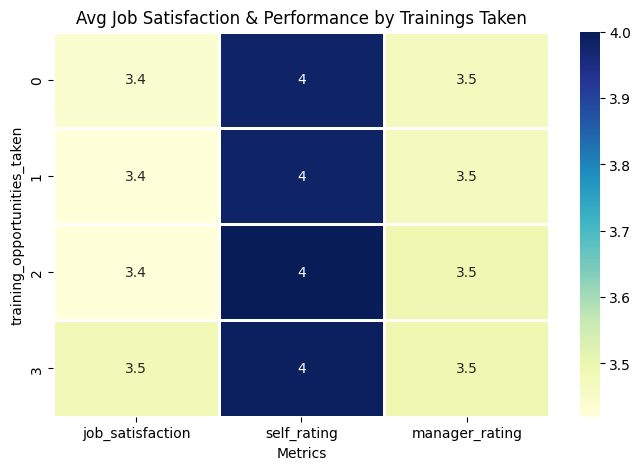

In [66]:
# Group by training count and calculate means
pivot = df.groupby('training_opportunities_taken')[
    ['job_satisfaction', 'self_rating', 'manager_rating']
].mean().round(2)

# Plot Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', linewidths=1)
plt.title('Avg Job Satisfaction & Performance by Trainings Taken')
plt.xlabel('Metrics')



**More training → slightly higher satisfaction and self-rated performance.**

# 4. Compensation and Retention
 Is there a trend between salary and attrition?




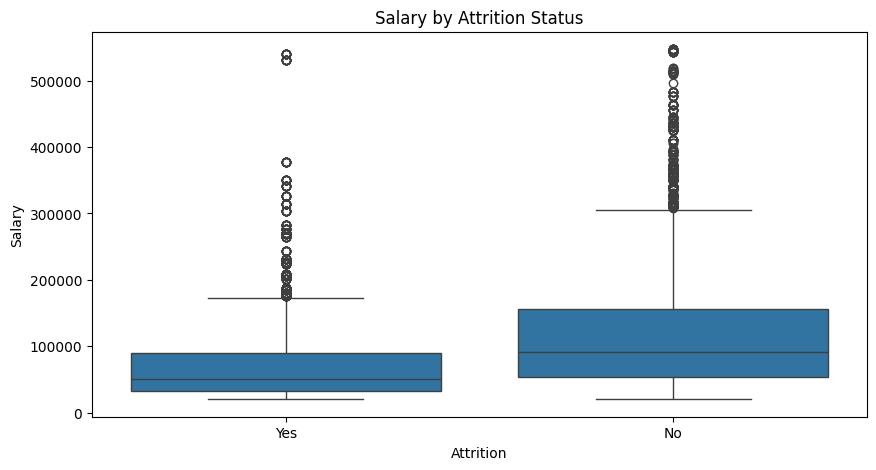

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='attrition', y='salary', data=df)
plt.title('Salary by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Salary')
plt.show()



**Lower salaries are associated with higher attrition.**

# Salary distribution by department and education


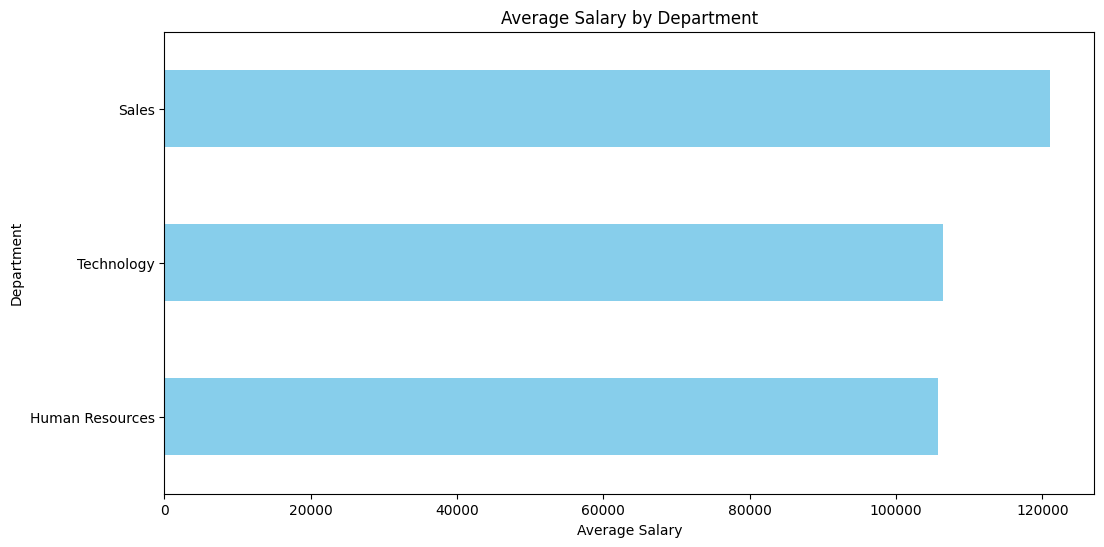

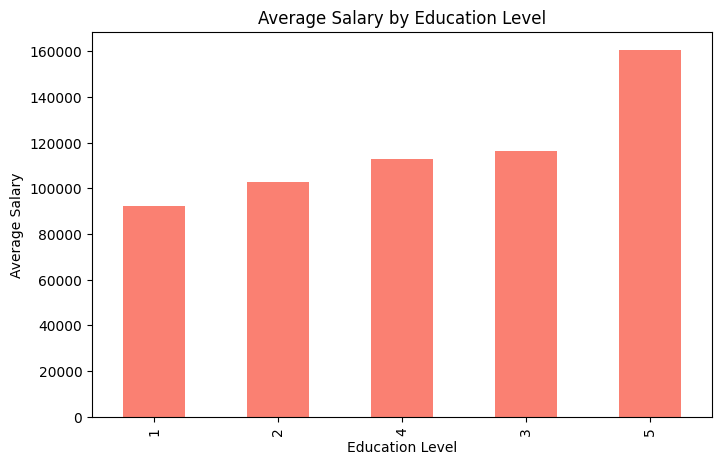

In [59]:
# Bar plot for average salary by department
plt.figure(figsize=(12, 6))
df.groupby('department')['salary'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Salary by Department')
plt.xlabel('Average Salary')
plt.ylabel('Department')
plt.show()

# Bar plot for average salary by education
plt.figure(figsize=(8, 5))
df.groupby('education')['salary'].mean().sort_values().plot(kind='bar', color='salmon')
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.show()



**Technical roles and higher education get higher salaries.**

# Do employees with higher salaries report higher satisfaction?

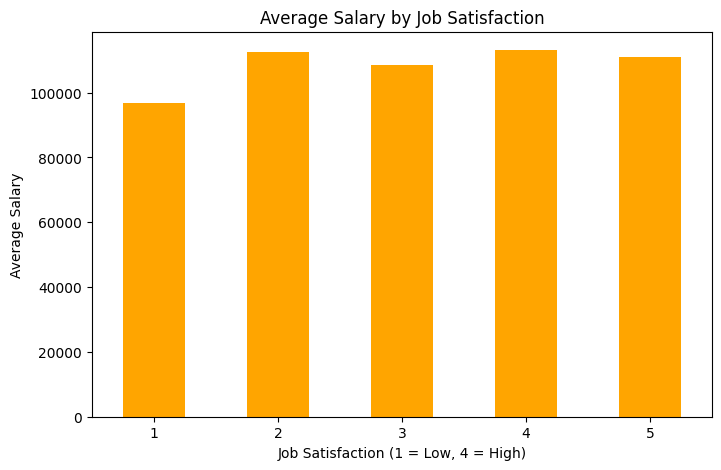

In [60]:
# Bar plot for average salary by job satisfaction level
plt.figure(figsize=(8, 5))
df.groupby('job_satisfaction')['salary'].mean().plot(kind='bar', color='orange')
plt.title('Average Salary by Job Satisfaction')
plt.xlabel('Job Satisfaction (1 = Low, 4 = High)')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()



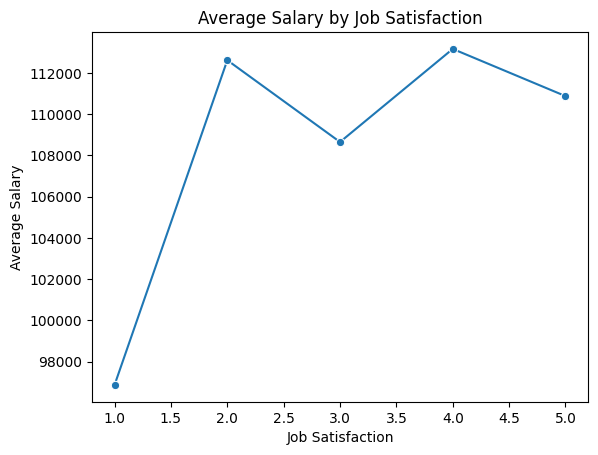

In [47]:
avg_salary = df.groupby('job_satisfaction')['salary'].mean().reset_index()
sns.lineplot(data=avg_salary, x='job_satisfaction', y='salary', marker='o')
plt.title('Average Salary by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Average Salary')
plt.show()


**Employees with higher salaries tend to report higher satisfaction.**

# 5. Experience and Career Development
 Is there a relation between years at the company and job satisfaction?

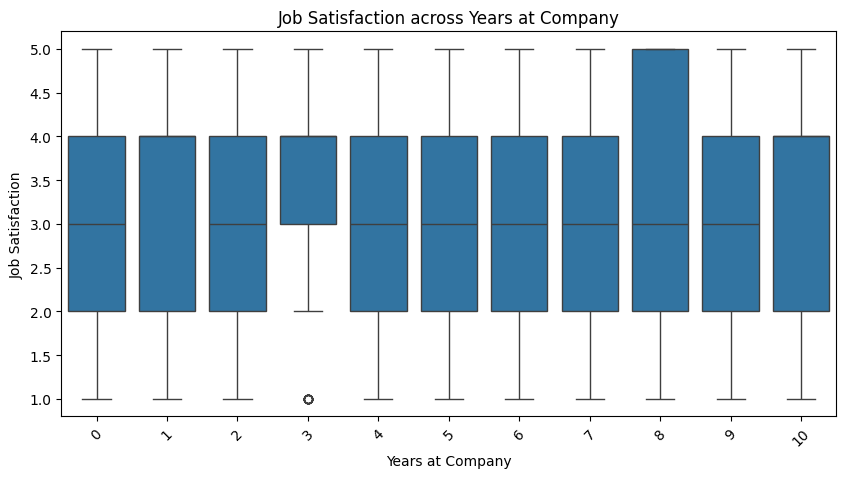

In [62]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='years_at_company', y='job_satisfaction', data=df)
plt.title('Job Satisfaction across Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.show()


**Slight positive trend; more experienced employees may be more satisfied.**

# How does the number of training sessions impact employee retention?

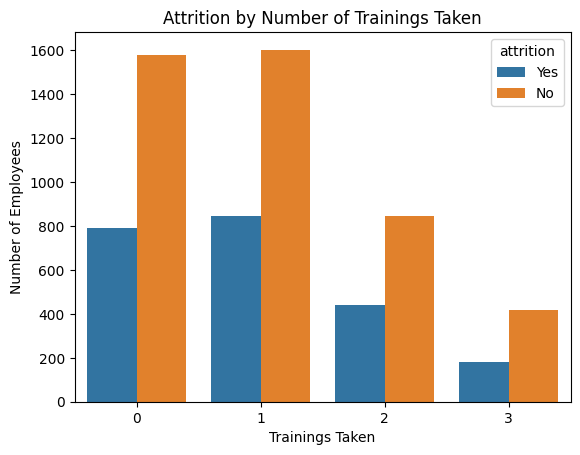

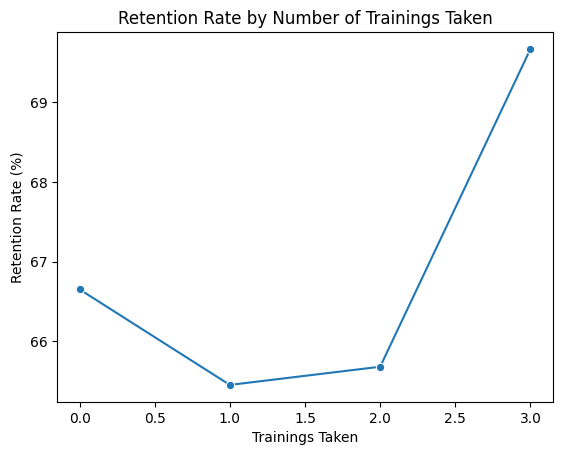

In [51]:
# Countplot (to see attrition count by training level)

sns.countplot(x='training_opportunities_taken', hue='attrition', data=df)
plt.title('Attrition by Number of Trainings Taken')
plt.xlabel('Trainings Taken')
plt.ylabel('Number of Employees')
plt.show()
# Lineplot (Retention rate by training level)

# Calculate retention rate (% of employees who stayed)
training_retention = df.groupby('training_opportunities_taken')['attrition'].value_counts(normalize=True).unstack().fillna(0)
training_retention['Retention Rate'] = training_retention['No'] * 100

training_retention.reset_index(inplace=True)
sns.lineplot(data=training_retention, x='training_opportunities_taken', y='Retention Rate', marker='o')
plt.title('Retention Rate by Number of Trainings Taken')
plt.xlabel('Trainings Taken')
plt.ylabel('Retention Rate (%)')
plt.show()

**More training is linked to better retention.**



### **Week 2 Analysis – Employee Satisfaction and Retention Factors**

1️⃣ **Key Areas of Analysis:**  
Explored how employee demographics, work conditions, performance ratings, compensation, and experience influence satisfaction and retention.

2️⃣ **Visual Analysis Tools Used:**  
Box plots, scatter plots, regression plots, and bar charts were used to visualize patterns and correlations.

3️⃣ **Key Findings:**  
- **Age**, **salary**, and **education** show slight trends in job satisfaction, though not strongly linear.  
- **Overtime**, **work-life balance**, and **department** have a notable impact on attrition.  
- **Manager rating** and **training participation** have a mild correlation with satisfaction and self-rating.  
- Employees with more **experience** or time with the same manager tend to show slightly higher satisfaction.

📌 **Conclusion:**  
The analysis suggests that while no single factor solely drives satisfaction or performance, a combination of **work environment, fair compensation, career growth**, and **managerial support** plays a critical role in enhancing employee satisfaction and reducing attrition.

---

